In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv('../data/processed/data_exploration.csv')
df.columns

Index(['terminal', 'delay', 'destination_airport', 'airline', 'temp_c',
       'precip_mm', 'wind_kph', 'departure_traffic', 'arrival_traffic',
       'day_in_month', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos'],
      dtype='object')

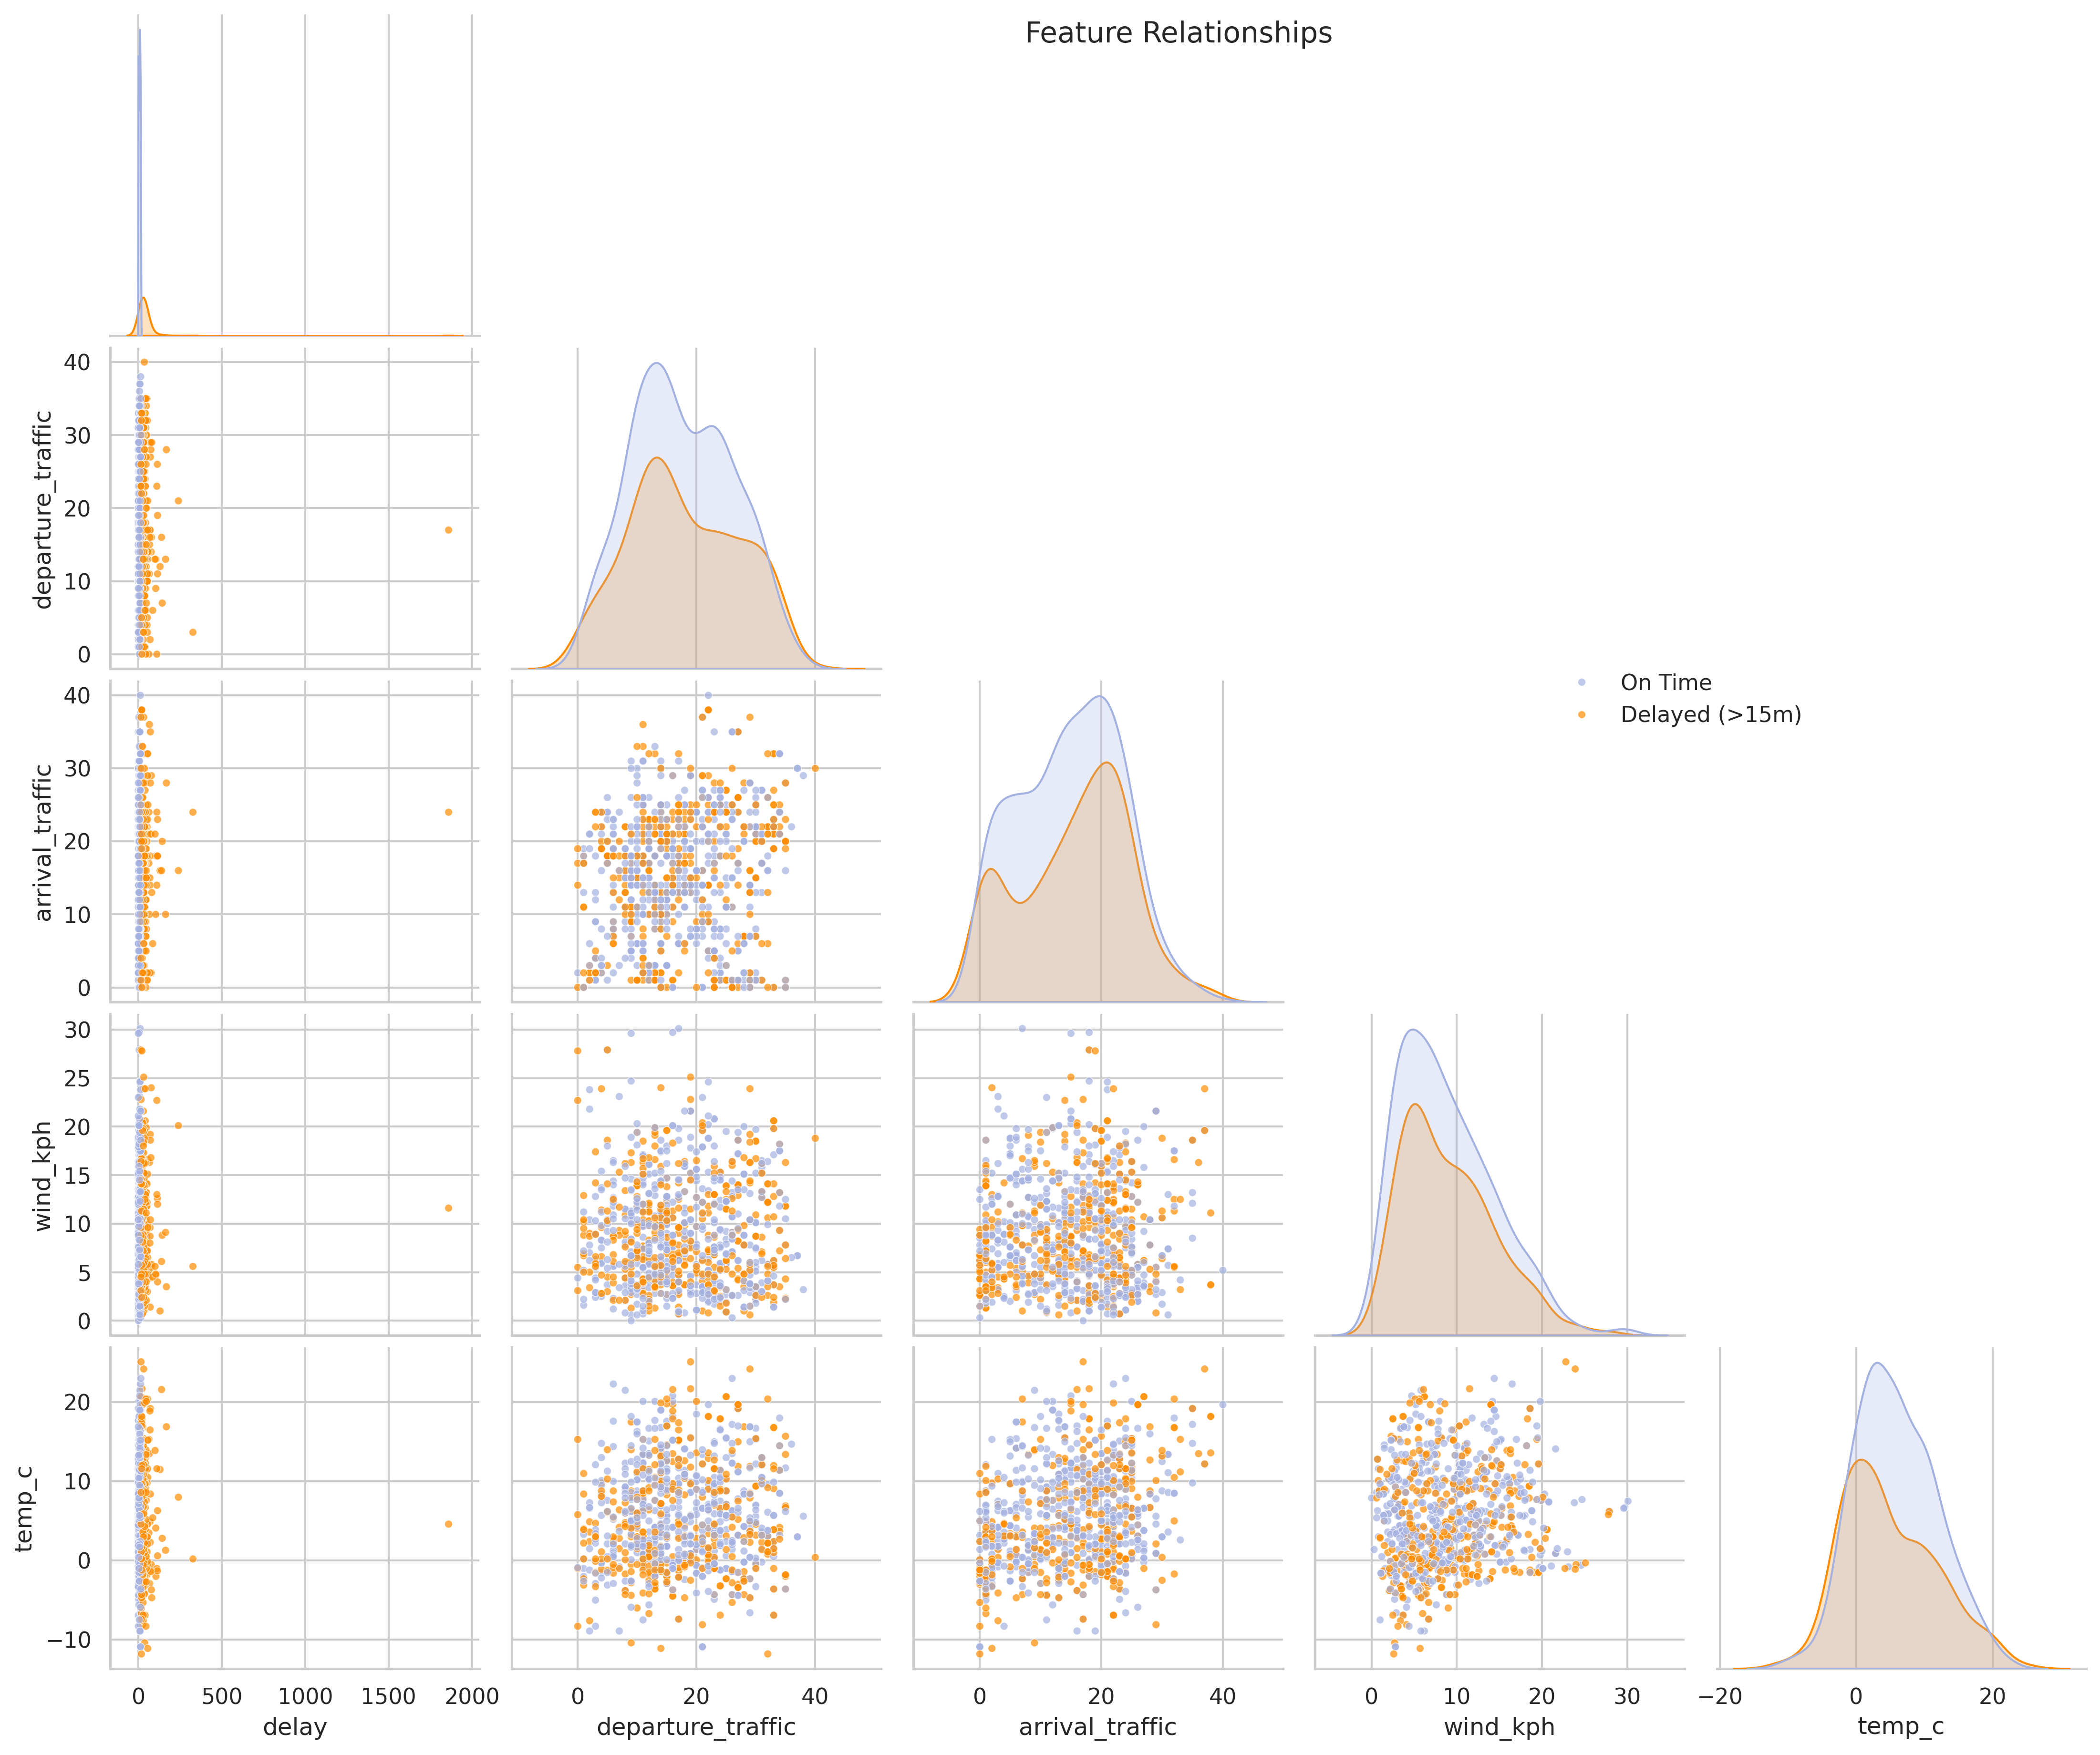

In [134]:
random_seed = 42

plot_df = df.sample(n=1000, random_state=random_seed).copy()

plot_df['Status'] = plot_df['delay'].apply(lambda x: 'Delayed (>15m)' if x > 15 else 'On Time')

features_to_plot = [
    'delay',
    'departure_traffic',
    'arrival_traffic',
    'wind_kph',
    'temp_c',
    'Status'
]

g = sns.pairplot(
    plot_df[features_to_plot],
    hue='Status',
    corner=True,
    kind='scatter',
    diag_kind='kde',
    palette={'On Time': '#A3B1E1', 'Delayed (>15m)': 'darkorange'},
    plot_kws={'alpha': 0.7, 's': 15},
    height=2.5,
    aspect=1.2
)

sns.move_legend(
    g, "center left", 
    bbox_to_anchor=(0.65, 0.6),
    frameon=False,
    title=None
)

g.fig.set_dpi(300)

plt.suptitle("Feature Relationships")
plt.show()

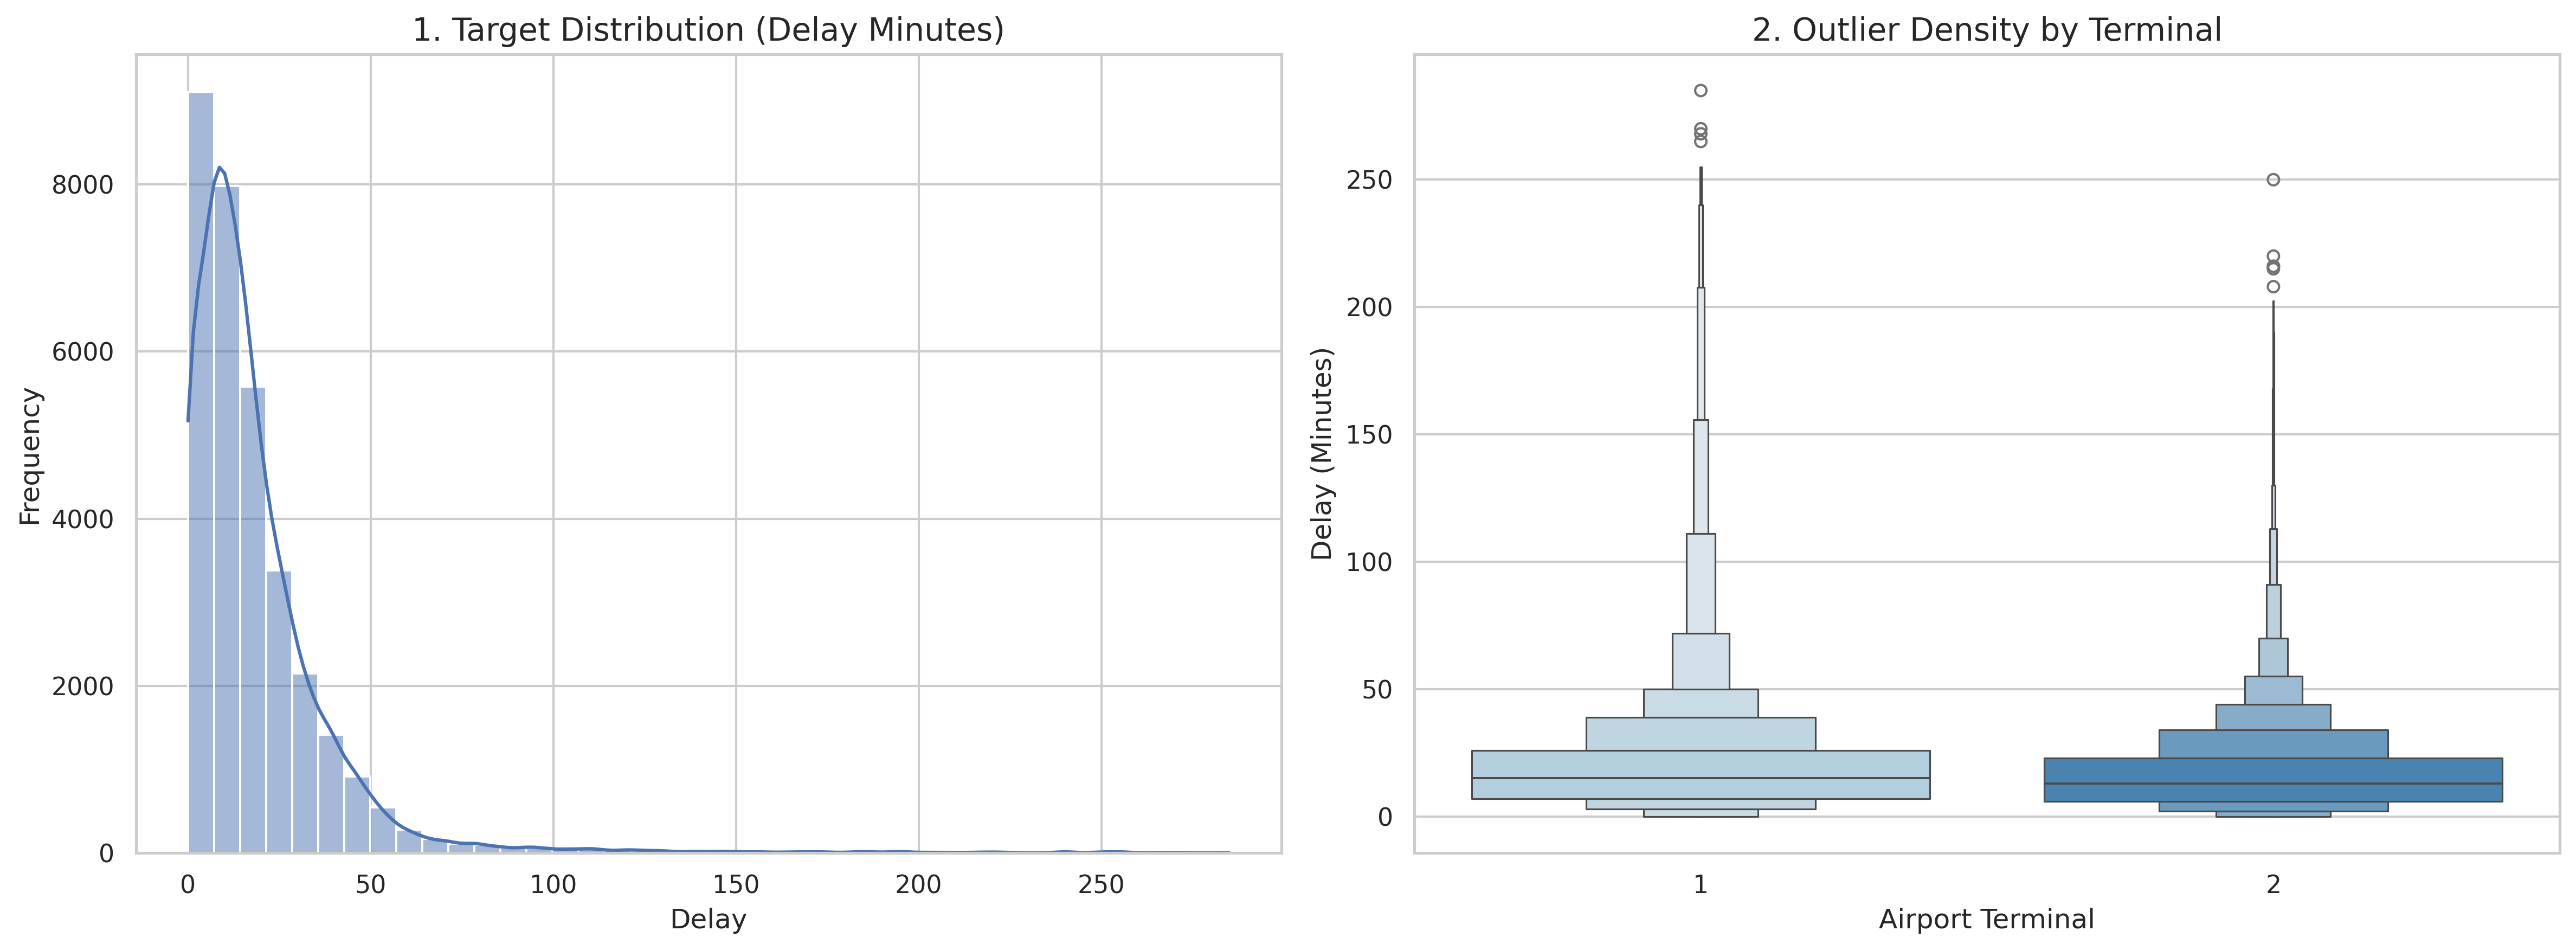

In [113]:
sns.set_theme(style="whitegrid")

plot_df = df[df['delay'] < 300].copy()

plot_df['terminal'] = plot_df['terminal'].astype(int).astype(str)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=300)

sns.histplot(
    plot_df['delay'], 
    kde=True, 
    bins=40, 
    ax=axes[0]
)
axes[0].set_title('1. Target Distribution (Delay Minutes)', fontsize=14)
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Delay')

sns.boxenplot(
    data=plot_df,
    x='terminal',
    hue='terminal',
    y='delay',
    palette='Blues',
    showfliers=True,
    ax=axes[1]
)
axes[1].set_title('2. Outlier Density by Terminal', fontsize=14)
axes[1].set_ylabel('Delay (Minutes)')
axes[1].set_xlabel('Airport Terminal')

plt.tight_layout()
plt.show()

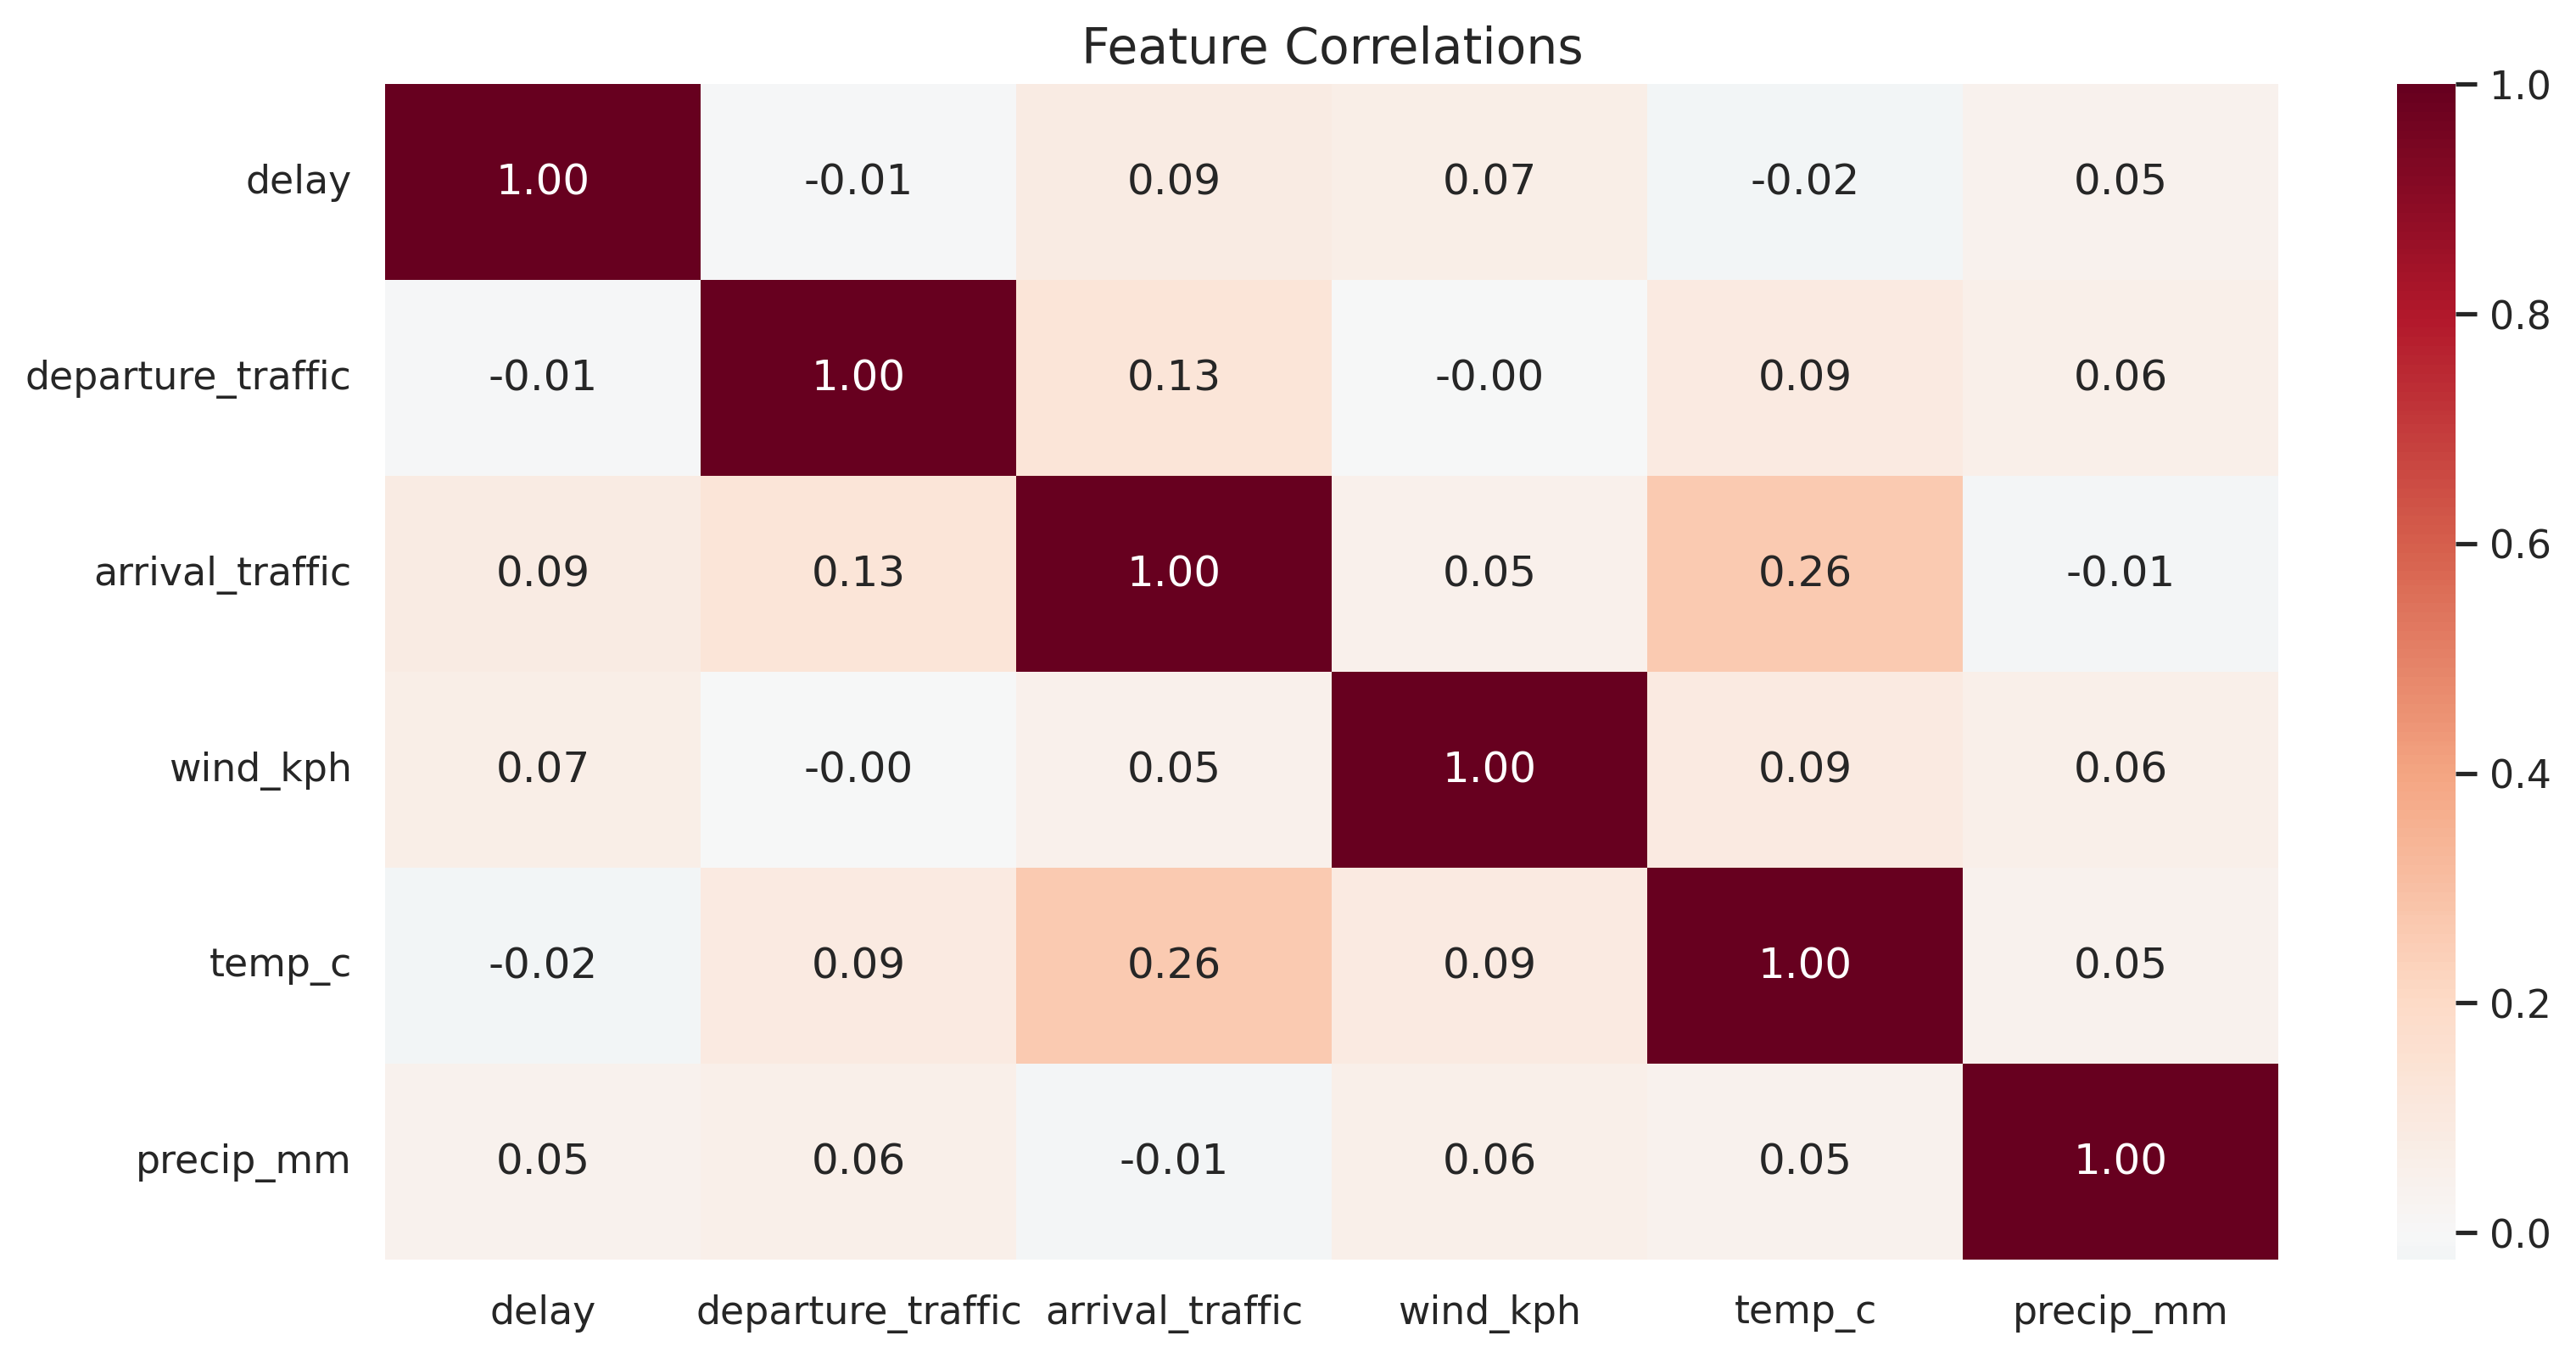

In [117]:
plt.figure(figsize=(12, 6), dpi=300) 

corr_cols = ['delay', 'departure_traffic', 'arrival_traffic', 'wind_kph', 'temp_c', 'precip_mm']

sns.heatmap(
    plot_df[corr_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',
    center=0,
)

plt.title('Feature Correlations', fontsize=14)
plt.show()

In [71]:
df = pd.read_csv('../data/data_exploration.csv')

df['is_high_wind'] = np.where(df['wind_kph'] > 20, 1, 0)

df['is_raining'] = np.where(df['precip_mm'] > 0, 1, 0)
df['is_heavy_rain'] = np.where(df['precip_mm'] > 2.0, 1, 0)

dep_traffic_cutoff = df['departure_traffic'].quantile(0.80)
arr_traffic_cutoff = df['arrival_traffic'].quantile(0.80)

df['is_high_dep_traffic'] = np.where(df['departure_traffic'] > dep_traffic_cutoff, 1, 0)
df['is_high_arr_traffic'] = np.where(df['arrival_traffic'] > arr_traffic_cutoff, 1, 0)

df['is_extreme_temp'] = np.where((df['temp_c'] < 0) | (df['temp_c'] > 35), 1, 0)

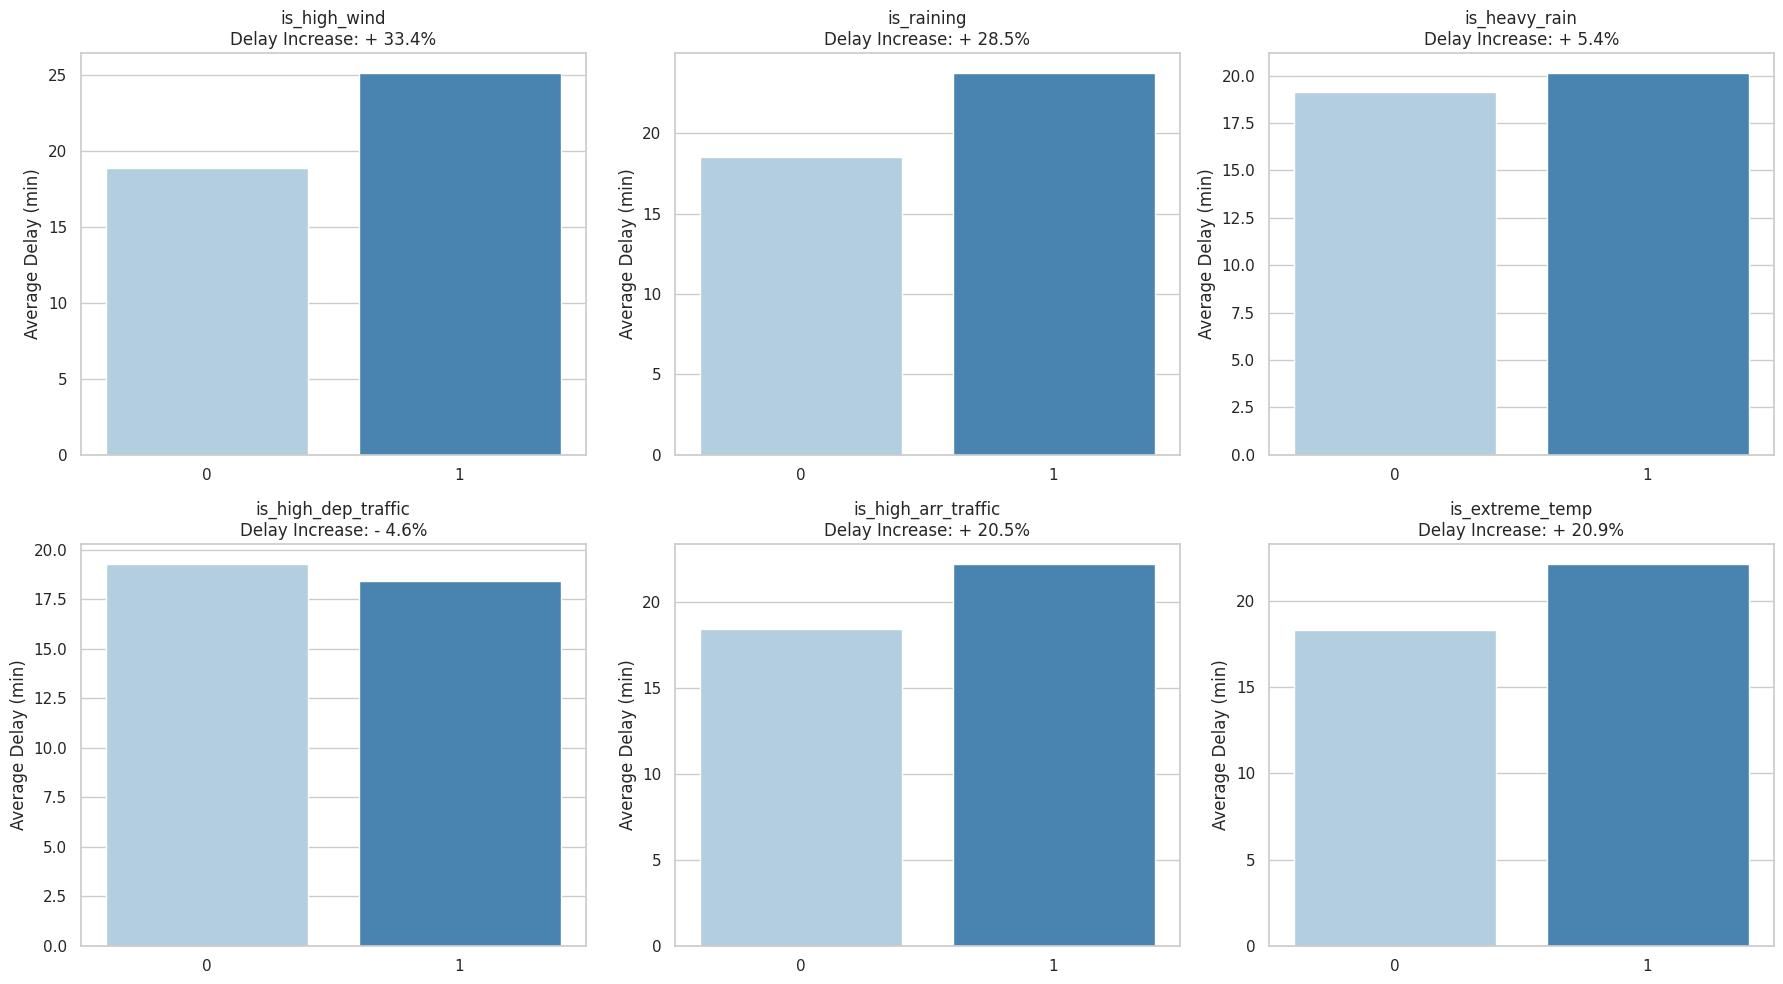

In [96]:
new_features = [
    'is_high_wind', 
    'is_raining', 
    'is_heavy_rain', 
    'is_high_dep_traffic', 
    'is_high_arr_traffic', 
    'is_extreme_temp'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(new_features):
    sns.barplot(
        data=df, 
        x=col, 
        hue=col,
        legend=False,
        y='delay', 
        ax=axes[i], 
        palette='Blues', 
        errorbar=None)
    
    avg_0 = df[df[col]==0]['delay'].mean()
    avg_1 = df[df[col]==1]['delay'].mean()
    pct_increase = ((avg_1 - avg_0) / avg_0) * 100
    
    axes[i].set_title(f"{col}\nDelay Increase: {'+' if pct_increase > 0 else '-'} {abs(pct_increase):.1f}%")
    axes[i].set_ylabel("Average Delay (min)")
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

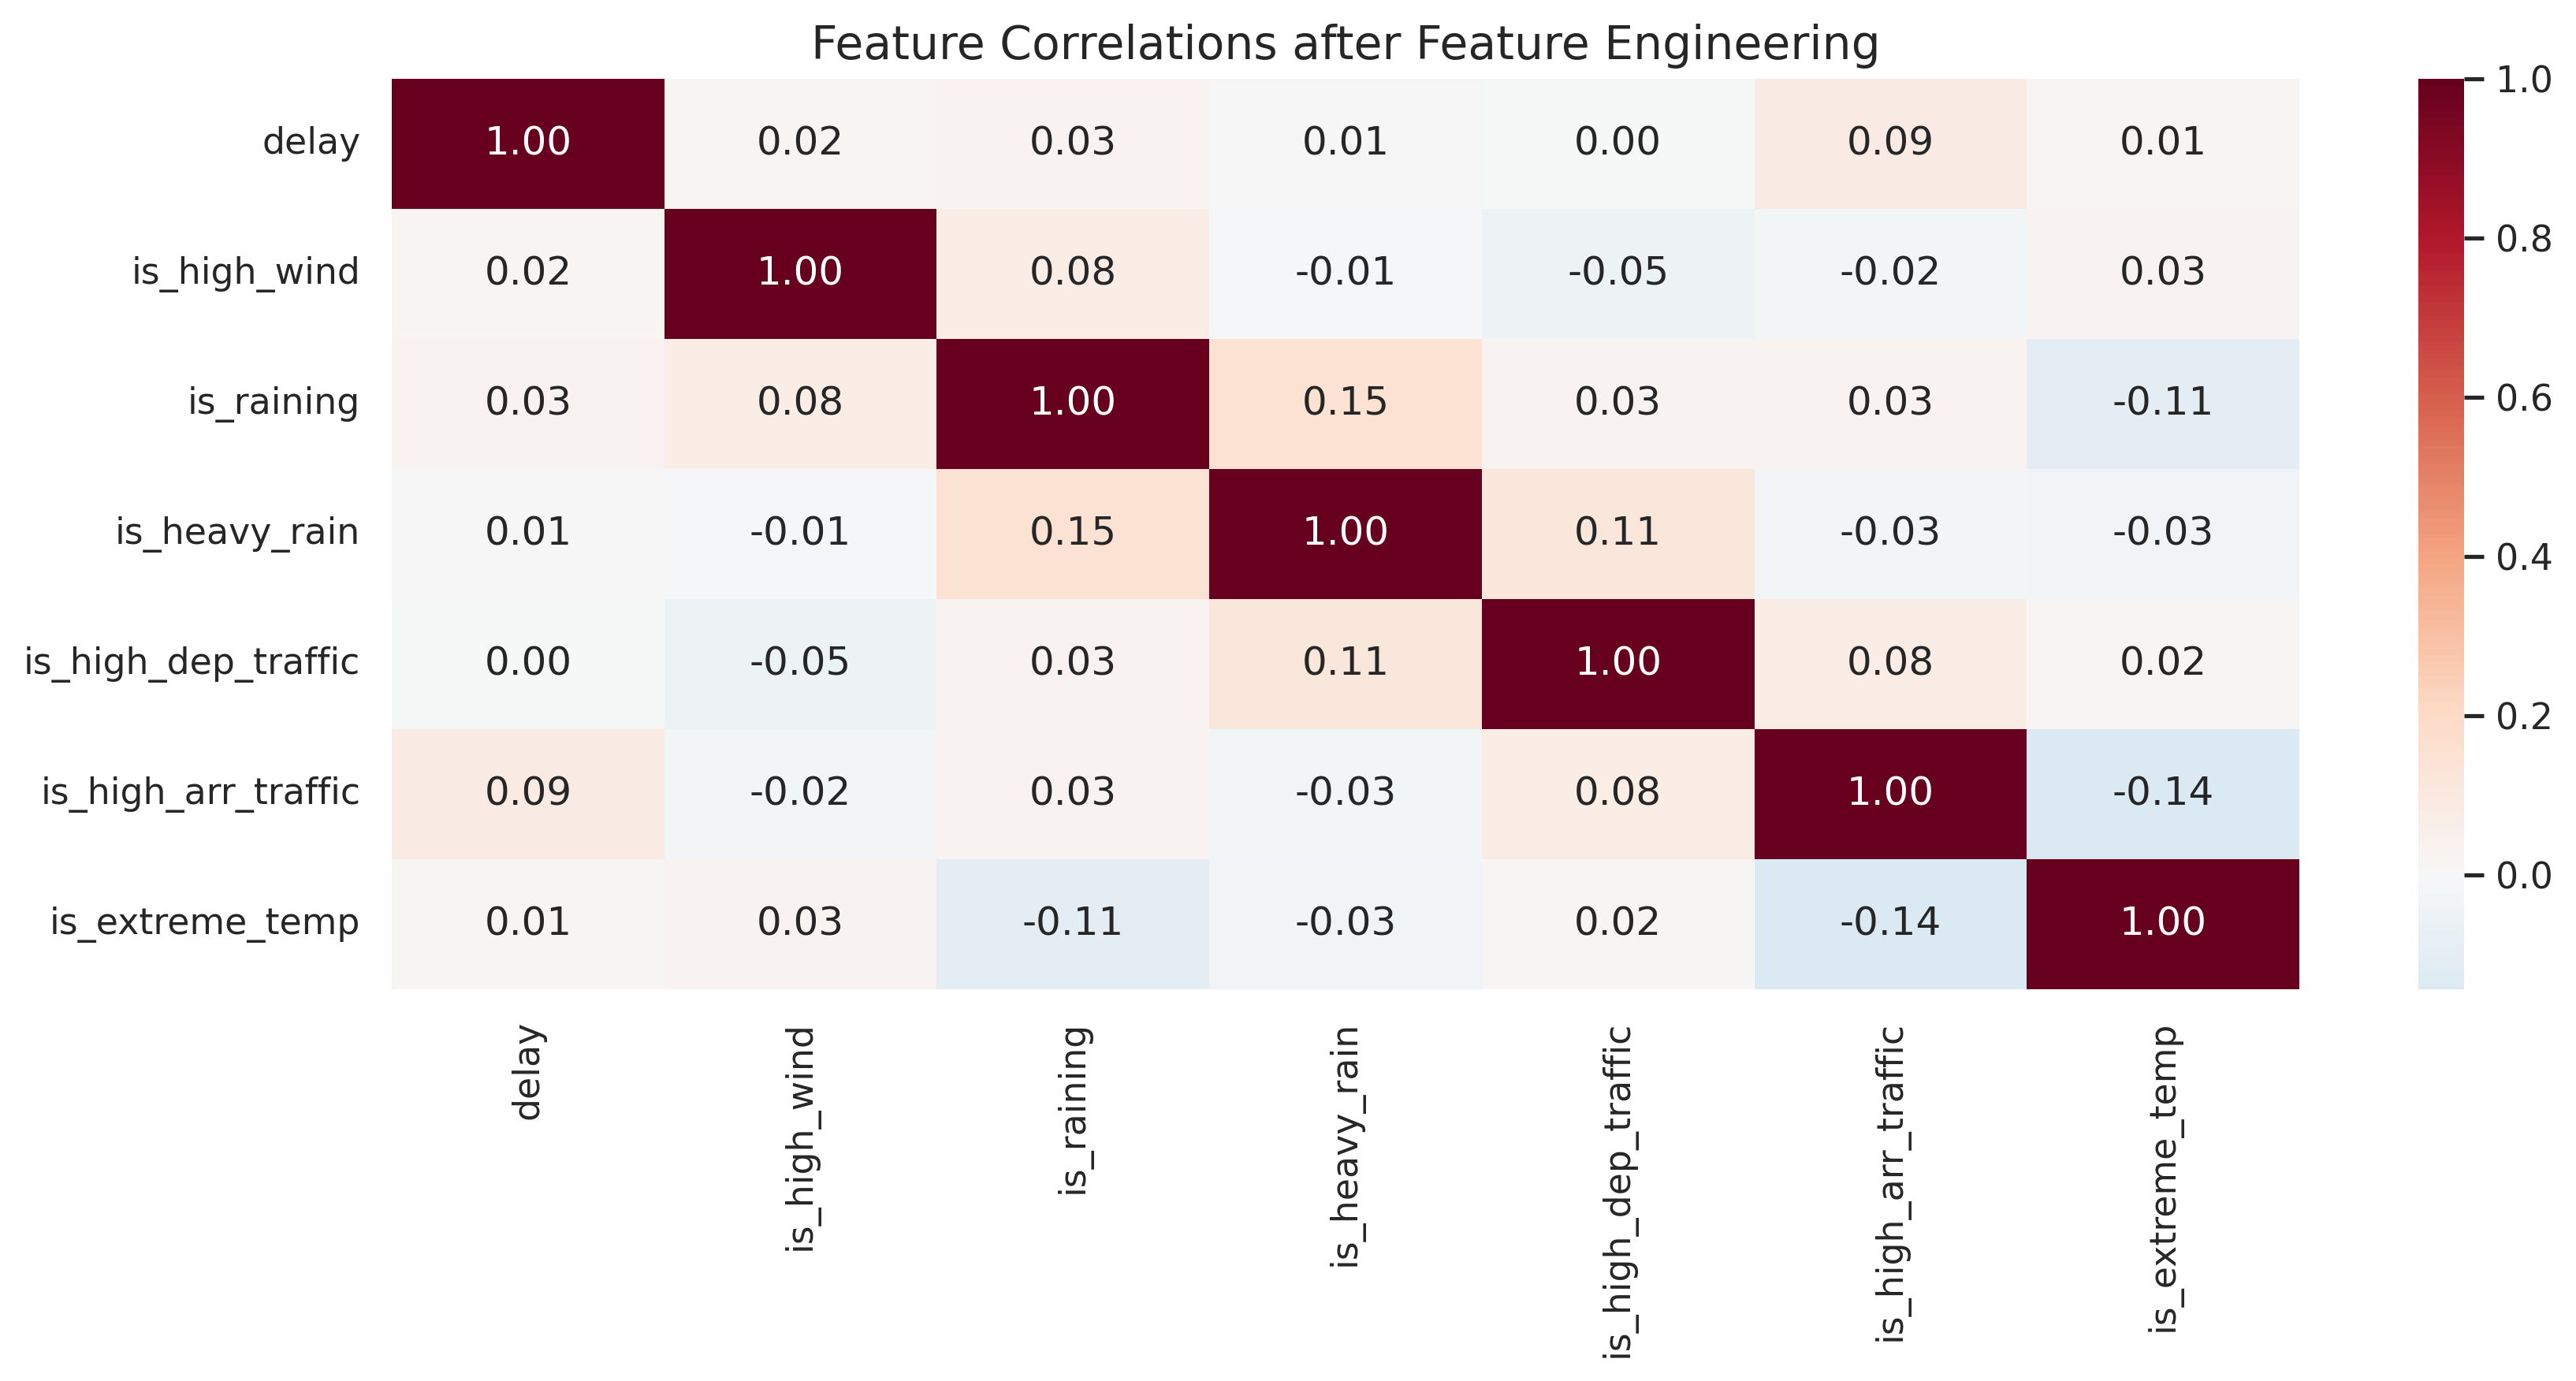

In [136]:
plt.figure(figsize=(12, 6), dpi=300) 

corr_cols = [
    'delay',
    'is_high_wind', 
    'is_raining', 
    'is_heavy_rain', 
    'is_high_dep_traffic', 
    'is_high_arr_traffic', 
    'is_extreme_temp'
]

sns.heatmap(
    plot_df[corr_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',
    center=0,
)

plt.title('Feature Correlations after Feature Engineering', fontsize=14)
plt.tight_layout()
plt.show()